In [42]:
import pandas as pd
import numpy as np
import sys
import psycopg2

import datetime 
from datetime import datetime, timedelta
import os 

import matplotlib.pyplot as plt
#import plotly as px
import seaborn as sns
import plotly.express as px
import json
import requests

import plotly.express as px
import plotly.offline as py

In [2]:
# What vaccination schemes (combination of vaccines) are used and in which countries?
## What country has vaccinated more people?
# What country has immunized the largest percent from its population?
# Can you trace the daily vaccinations dynamic?


In [3]:
## Importing the data set

df = pd.read_csv('country_vaccinations.csv')
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


In [4]:
##getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48113 entries, 0 to 48112
Data columns (total 15 columns):
country                                48113 non-null object
iso_code                               48113 non-null object
date                                   48113 non-null object
total_vaccinations                     26332 non-null float64
people_vaccinated                      24993 non-null float64
people_fully_vaccinated                22062 non-null float64
daily_vaccinations_raw                 21628 non-null float64
daily_vaccinations                     47871 non-null float64
total_vaccinations_per_hundred         26332 non-null float64
people_vaccinated_per_hundred          24993 non-null float64
people_fully_vaccinated_per_hundred    22062 non-null float64
daily_vaccinations_per_million         47871 non-null float64
vaccines                               48113 non-null object
source_name                            48113 non-null object
source_website              

In [5]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.633200e+04,2.499300e+04,2.206200e+04,2.162800e+04,4.787100e+04,26332.000000,24993.000000,22062.000000,47871.000000
mean,2.172153e+07,9.234341e+06,5.998278e+06,2.587079e+05,1.310687e+05,45.816391,27.632116,20.782706,3535.927618
std,1.236269e+08,3.628087e+07,2.370766e+07,1.300218e+06,8.664519e+05,46.317175,24.940444,22.116300,4386.133709
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.257012e+05,1.760370e+05,8.711375e+04,5.042000e+03,8.950000e+02,5.680000,4.400000,2.520000,529.000000
50%,1.590494e+06,1.049514e+06,6.869110e+05,2.488400e+04,6.881000e+03,28.650000,20.120000,11.545000,2221.000000
75%,8.314824e+06,4.956455e+06,3.587027e+06,1.140095e+05,4.192500e+04,77.765000,48.400000,34.890000,5251.000000
max,2.211452e+09,1.100842e+09,1.047872e+09,2.474100e+07,2.242429e+07,236.050000,118.540000,117.510000,117497.000000


In [6]:
df.shape

(48113, 15)

In [7]:
## Data wrangling

#We will drop the daily vaccinations_raw as there is another column called the daily_vaccinations
df =df.drop('daily_vaccinations_raw', axis = 1)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


In [8]:
##finding the percentage of missing values in our columns 

df.isna().mean().round(4)*100

country                                 0.00
iso_code                                0.00
date                                    0.00
total_vaccinations                     45.27
people_vaccinated                      48.05
people_fully_vaccinated                54.15
daily_vaccinations                      0.50
total_vaccinations_per_hundred         45.27
people_vaccinated_per_hundred          48.05
people_fully_vaccinated_per_hundred    54.15
daily_vaccinations_per_million          0.50
vaccines                                0.00
source_name                             0.00
source_website                          0.00
dtype: float64

In [9]:
## Finding the vaccination Schemes(combinations of vaccines) used and in which countries

## group by latest date for each country first
joiner = df.groupby('country')['date'].max().reset_index()
joiner
df1 = pd.merge(joiner,df, on = ['date','country'])
df1


,country,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,2021-09-16,AFG,3133227.0,NaN,NaN,72098.0,7.87,NaN,NaN,1810.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Albania,2021-09-29,ALB,1732549.0,944011.0,788538.0,8351.0,60.31,32.86,27.45,2907.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,http://www.shendetesia.gov.al/vaksinimi-antico...
2,Algeria,2021-09-25,DZA,14082920.0,6017036.0,4032942.0,314866.0,31.56,13.49,9.04,7057.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",World Health Organization,https://covid19.who.int/
3,Andorra,2021-08-29,AND,95918.0,52910.0,43008.0,304.0,124.00,68.40,55.60,3930.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://who.maps.arcgis.com/apps/dashboards/ea...
4,Angola,2021-09-26,AGO,3134137.0,2127405.0,1006732.0,44858.0,9.24,6.27,2.97,1322.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
5,Anguilla,2021-09-24,AIA,18584.0,9498.0,9086.0,3.0,122.87,62.80,60.07,198.0,Oxford/AstraZeneca,World Health Organization,https://ais.paho.org/imm/IM_DosisAdmin-Vacunac...
6,Antigua and Barbuda,2021-09-28,ATG,93318.0,51148.0,42170.0,1030.0,94.52,51.81,42.71,10433.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Ministry of Health,https://covid19.gov.ag
7,Argentina,2021-09-30,ARG,51711461.0,29676037.0,22088966.0,243042.0,113.39,65.07,48.43,5329.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
8,Armenia,2021-09-26,ARM,408535.0,264695.0,143840.0,5965.0,13.76,8.92,4.85,2010.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.moh.am/#1/4335
9,Aruba,2021-09-30,ABW,156179.0,81374.0,74805.0,120.0,145.70,75.91,69.78,1119.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw


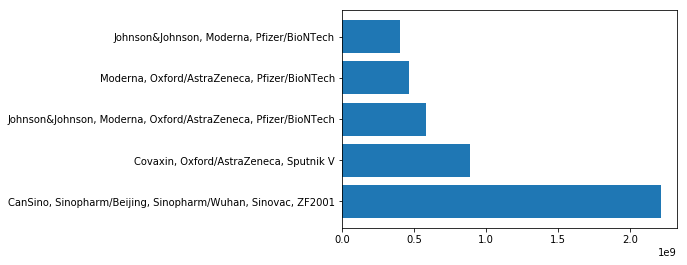

In [10]:
#plotting the top most 5 used vaccine combinations

most_used_vaccine = pd.DataFrame(df1.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending = False).head(5)).reset_index()
most_used_vaccine

fig, ax = plt.subplots()

ax.barh(most_used_vaccine['vaccines'],most_used_vaccine['total_vaccinations'])
      
plt.show()

In [11]:
## finding the countries in wchich the vacciness are used in 

countries_used = pd.merge(df1,most_used_vaccine, on = ['vaccines'])
countries_used

,country,date,iso_code,total_vaccinations_x,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,total_vaccinations_y
0,Australia,2021-09-30,AUS,2.775050e+07,16547863.0,11202638.0,281141.0,107.61,64.17,43.44,10902.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of Australia via covidlive.com.au,https://covidlive.com.au/vaccinations,4.651800e+08
1,Canada,2021-09-30,CAN,5.620362e+07,29239397.0,26964219.0,96549.0,147.64,76.81,70.83,2536.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,4.651800e+08
2,Croatia,2021-09-29,HRV,3.428029e+06,1817444.0,1705090.0,5716.0,83.99,44.53,41.77,1400.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.koronavirus.hr,4.651800e+08
3,England,2021-09-29,OWID_ENG,7.854954e+07,40950486.0,37599053.0,54368.0,138.90,72.41,66.49,961.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,4.651800e+08
4,Finland,2021-09-30,FIN,7.582431e+06,4133283.0,3449148.0,16200.0,136.66,74.50,62.17,2920.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Finnish Institute for Health and Welfare,https://sampo.thl.fi/pivot/prod/en/vaccreg/cov...,4.651800e+08
5,Guernsey,2021-09-29,GGY,1.019860e+05,NaN,NaN,44.0,152.10,NaN,NaN,656.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of Guernsey,https://covid19.gov.gg/guidance/vaccine/stats,4.651800e+08
6,Isle of Man,2021-09-28,IMN,1.293190e+05,65461.0,63858.0,3.0,151.41,76.64,74.77,35.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Isle of Man Government,https://covid19.gov.im/general-information/cov...,4.651800e+08
7,Japan,2021-09-30,JPN,1.648590e+08,89154655.0,75704359.0,1185588.0,130.79,70.73,60.06,9406.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Prime Minister's Office,https://www.kantei.go.jp/jp/headline/kansensho...,4.651800e+08
8,Jersey,2021-09-26,JEY,1.531960e+05,77168.0,74026.0,329.0,151.57,76.35,73.24,3255.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of Jersey,https://www.gov.je/Datasets/ListOpenData?ListN...,4.651800e+08
9,Northern Ireland,2021-09-29,OWID_NIR,2.520419e+06,1312618.0,1207801.0,1391.0,132.93,69.23,63.70,734.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,4.651800e+08


In [43]:
## vaccine map for the top 5 most vaccine combinations
vaccine_map = px.choropleth(countries_used, locations = 'iso_code', color = 'vaccines')
vaccine_map.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
vaccine_map.show()

In [44]:
## vaccine map for all vaccines 
vaccine_map1 = px.choropleth(df, locations = 'iso_code', color = 'vaccines')
vaccine_map1.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
vaccine_map1.show()

In [12]:
## Top 5 countries that have vaccinated most people
most_vaccinated = df1.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(5).reset_index()
most_vaccinated

,country,people_vaccinated
0,India,648949043.0
1,United States,214332261.0
2,Brazil,151150943.0
3,Indonesia,91079001.0
4,Japan,89154655.0


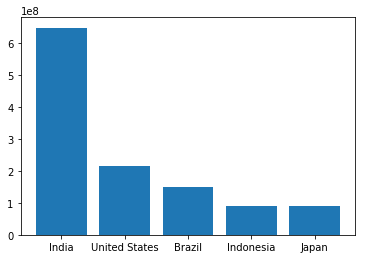

In [13]:
fig, ax = plt.subplots()

ax.bar(most_vaccinated['country'],most_vaccinated['people_vaccinated'])
      
plt.show()

In [14]:
dft = df[df['country']=='Gibraltar']
dft

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
16615,Gibraltar,GIB,2021-01-10,420.0,420.0,NaN,NaN,1.25,1.25,NaN,NaN,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16616,Gibraltar,GIB,2021-01-11,1445.0,1445.0,NaN,1025.0,4.29,4.29,NaN,30424.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16617,Gibraltar,GIB,2021-01-12,2501.0,2501.0,NaN,1040.0,7.42,7.42,NaN,30869.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16618,Gibraltar,GIB,2021-01-13,NaN,NaN,NaN,986.0,NaN,NaN,NaN,29266.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16619,Gibraltar,GIB,2021-01-14,NaN,NaN,NaN,959.0,NaN,NaN,NaN,28465.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16620,Gibraltar,GIB,2021-01-15,5135.0,5135.0,NaN,943.0,15.24,15.24,NaN,27990.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16621,Gibraltar,GIB,2021-01-16,5847.0,5847.0,NaN,904.0,17.35,17.35,NaN,26832.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16622,Gibraltar,GIB,2021-01-17,5847.0,5847.0,NaN,775.0,17.35,17.35,NaN,23003.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16623,Gibraltar,GIB,2021-01-18,6435.0,6435.0,NaN,713.0,19.10,19.10,NaN,21163.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...
16624,Gibraltar,GIB,2021-01-19,7017.0,7017.0,NaN,645.0,20.83,20.83,NaN,19145.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/144282...


In [41]:
## Top 5 countries with largest percentage of people vaccinated
most_per_vaccinated = df1.groupby(['country'])['people_vaccinated_per_hundred'].max().sort_values(ascending = False).head(5).reset_index()
most_per_vaccinated


,country,people_vaccinated_per_hundred
0,Gibraltar,118.54
1,Pitcairn,100.00
2,United Arab Emirates,93.05
3,Portugal,87.83
4,Cayman Islands,82.90


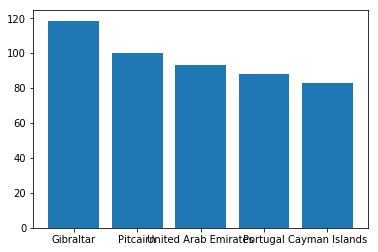

In [66]:
fig, ax = plt.subplots()

ax.bar(most_per_vaccinated['country'],most_per_vaccinated['people_vaccinated_per_hundred'])
      
plt.show()

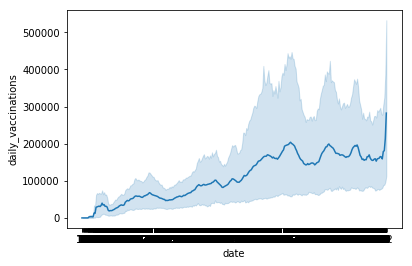

In [64]:
## The daily vaccinations dynamics 
#for i in df1.shape
df2 = pd.merge(df,most_per_vaccinated, on = ['country'])
sns.lineplot( x=df["date"], y=df["daily_vaccinations"])
plt.show()
#plt.legend(labels=df["country"], loc = 2, bbox_to_anchor = (1,1))

In [36]:
df2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred_x,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,people_vaccinated_per_hundred_y
0,Cayman Islands,CYM,2020-12-26,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
1,Cayman Islands,CYM,2020-12-27,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
2,Cayman Islands,CYM,2020-12-28,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
3,Cayman Islands,CYM,2020-12-29,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
4,Cayman Islands,CYM,2020-12-30,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
5,Cayman Islands,CYM,2020-12-31,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
6,Cayman Islands,CYM,2021-01-01,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
7,Cayman Islands,CYM,2021-01-02,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
8,Cayman Islands,CYM,2021-01-03,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
9,Cayman Islands,CYM,2021-01-04,NaN,NaN,NaN,275.0,NaN,NaN,NaN,4135.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Cayman Islands Government,https://www.exploregov.ky/coronavirus-statistics,82.90
